In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm

In [2]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [3]:
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')

In [4]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()
nsubjects = diffmats.shape[0]
ngenes = len(genemaps)
gene_fmri_corr = np.zeros((ngenes,nsubjects))

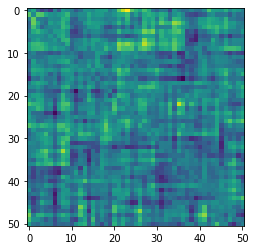

In [38]:
#first subject
first_subject_diffmat = diffmats[0,:,:]
plt.imshow(first_subject_diffmat)

In [27]:
absolute_diffmat = np.zeros((661,51))
absolute_diffmat.shape

(661, 51)

In [30]:
#taking absolute sum of all subject diffmats
for s in tqdm(range(nsubjects)):
    subject_diffmat = diffmats[s,:,:]
    abs_sum = abs(subject_diffmat).sum(axis=1) #51 vector
    absolute_diffmat[s,:] = abs_sum

100%|██████████| 661/661 [00:00<00:00, 122171.37it/s]


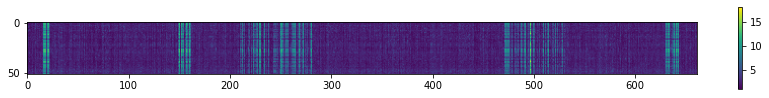

In [37]:
plt.figure(figsize=(15,5))
plt.imshow(absolute_diffmat.transpose())
plt.colorbar(shrink=.3)

In [44]:
roi_expression = np.zeros((13,51))
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression[g,:] = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])

100%|██████████| 13/13 [00:00<00:00, 21.93it/s]


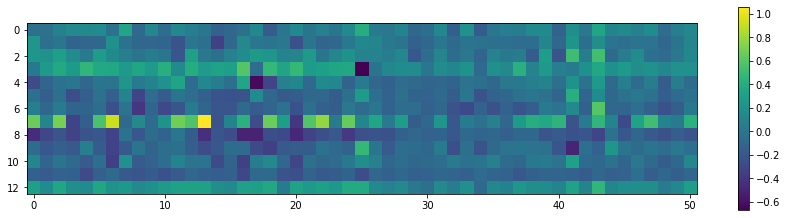

In [48]:
plt.figure(figsize=(15,5))
plt.imshow(roi_expression)
plt.colorbar(shrink=.75)

In [50]:
# Cross Correlate
gene_fmri_corr.shape

(13, 661)

In [58]:
for s in tqdm(range(nsubjects)):
    for g in range(ngenes):
        gene_fmri_corr[g,s] = np.corrcoef(absolute_diffmat[s,:],roi_expression[g,:])[0,1]

100%|██████████| 661/661 [00:00<00:00, 1232.40it/s]


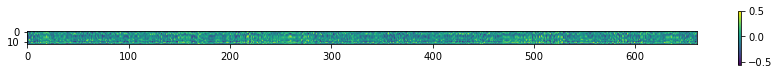

In [62]:
plt.figure(figsize=(15,2))
plt.imshow(gene_fmri_corr)
plt.colorbar(shrink=.5)